In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.12.1


11490434/11490434 [==============================] - 1s 0us/step
index: 16891


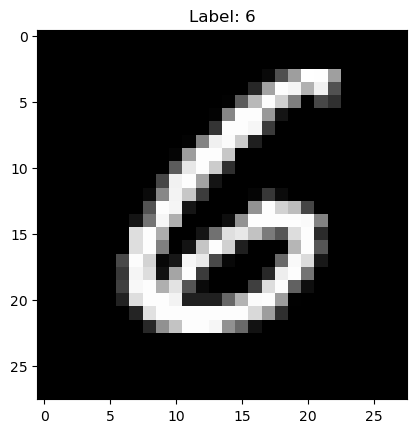

width: 28, height: 28


In [2]:
import matplotlib.pyplot as plt
import random

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# random pick 1 img
index = random.randint(0, len(x_train) - 1)
print(f"index: {index}")
image = x_train[index]
label = y_train[index]


# show img
plt.figure()
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')  # hide axis
plt.show()

image_height, image_width = image.shape
print(f"width: {image_height}, height: {image_width}")


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, 28, padding= "same", input_shape = (image_height, image_width, 1), activation = "relu", name="Conv-1"),
  tf.keras.layers.Conv2D(16, 3, activation = "relu", name="Conv-2"),
  tf.keras.layers.MaxPool2D(pool_size = (2, 2), name="Pooling-1"),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32, 13, padding= "same", activation = "relu", name="Conv-3"),
  tf.keras.layers.Conv2D(32, 3, activation = "relu", name="Conv-4"),
  tf.keras.layers.MaxPool2D(pool_size = (2, 2), name="Pooling-2"),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu", name="FullConnected-1"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation="relu", name="FullConnected-2"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation="softmax", name="Output")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv-1 (Conv2D)             (None, 28, 28, 16)        12560     
                                                                 
 Conv-2 (Conv2D)             (None, 26, 26, 16)        2320      
                                                                 
 Pooling-1 (MaxPooling2D)    (None, 13, 13, 16)        0         
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 Conv-3 (Conv2D)             (None, 13, 13, 32)        86560     
                                                                 
 Conv-4 (Conv2D)             (None, 11, 11, 32)        9248      
                                                                 
 Pooling-2 (MaxPooling2D)    (None, 5, 5, 32)          0

In [8]:
model.compile(optimizer='adam',
              # This loss fn use numerical value of y, not one hot encoding
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 600, epochs = 5)

loss, accuracy = model.evaluate(x_test, y_test)


Epoch 1/3
100/100 [==============================] - 61s 606ms/step - loss: 0.0979 - accuracy: 0.9743
Epoch 2/3
100/100 [==============================] - 61s 613ms/step - loss: 0.0803 - accuracy: 0.9786
Epoch 3/3
313/313 [==============================] - 3s 10ms/step - loss: 0.0451 - accuracy: 0.9878


In [9]:
predictions = model(x_train[:1]).numpy()
predictions

array([[1.4591621e-06, 7.7641317e-07, 3.0993745e-06, 7.9278257e-03,
        1.0220120e-07, 9.9171716e-01, 5.1155630e-06, 5.3343018e-07,
        2.7631526e-04, 6.7540539e-05]], dtype=float32)

In [10]:
tf.nn.softmax(predictions).numpy()

array([[0.08543973, 0.08543967, 0.08543987, 0.08611965, 0.08543961,
        0.2303332 , 0.08544004, 0.08543965, 0.08546322, 0.08544537]],
      dtype=float32)

Loss: 4.506615549325943%
Accuracy: 98.78000020980835%


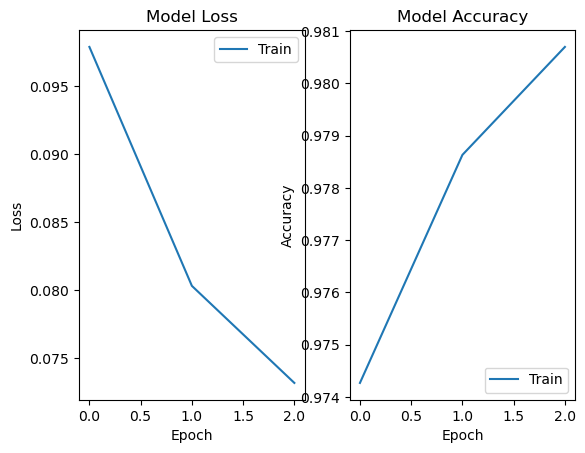

In [16]:
import numpy as np

print(f"Loss: {loss * 100}%")
print(f"Accuracy: {accuracy * 100}%")

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2) 
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
np.set_printoptions(precision=2)

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

prediction = model.predict(x_test)
prediction_val = [np.argmax(x) for x in prediction]

313/313 [==============================] - 3s 9ms/step


Confusion matrix, without normalization
[[ 974    0    0    0    0    0    3    2    0    1]
 [   0 1129    2    0    0    0    2    1    1    0]
 [   1    1 1019    1    1    0    0    6    2    1]
 [   1    0    2  996    0    5    0    4    2    0]
 [   0    0    0    0  976    0    2    0    0    4]
 [   2    0    0    5    0  879    1    1    1    3]
 [   3    3    0    0    3    6  943    0    0    0]
 [   0    1    4    0    0    0    0 1020    1    2]
 [   1    1    3    0    4    6    0    2  954    3]
 [   0    1    0    1   10    5    0    4    0  988]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

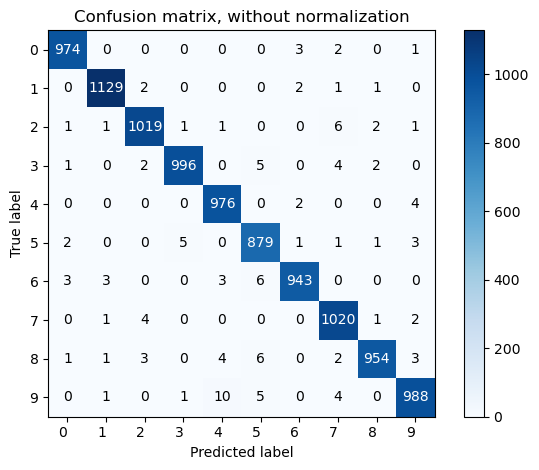

In [18]:
plot_confusion_matrix(y_test, prediction_val)

In [19]:
from math import sqrt, ceil, floor
# https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras
from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

def display_activation(activations, act_index):
  activation = activations[act_index]
  if len(activation.shape) > 1:
    count = activation.shape[-1]
  else:
    count = 1
  sqrt_count = ceil(sqrt(count))
#   total_row = sqrt_count
  total_row = 1
  total_col = ceil(count / total_row)
  activation_index=0
  fig, ax = plt.subplots(total_row, total_col, figsize=(total_col, total_row*1.5))
  activation_index=0
  default_img = np.zeros(activation[0, :, :, activation_index].shape, dtype = int)

  for row in range(0, total_row):
    for col in range(0, total_col):
#     for col in range(0, 1):
      if row * total_col + col < count:
        if total_row > 1:
          ax[row][col].set_xticks([])
          ax[row][col].set_yticks([])
          ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
        else:
          ax[col].set_xticks([])
          ax[col].set_yticks([])
          ax[col].imshow(activation[0, :, :, activation_index], cmap='gray')
          activation_index += 1
      else:
        if total_row > 1:
          ax[row][col].set_xticks([])
          ax[row][col].set_yticks([])
          ax[row][col].imshow(default_img, cmap='gray')
        else:
          ax[col].set_xticks([])
          ax[col].set_yticks([])
          ax[col].imshow(default_img, cmap='gray')

In [20]:
# activations = activation_model.predict(x_test[3].reshape(1,28,28,1))

# for activation in activations:
#   print(activation.shape)
# activations = np.average(activations3, activations10, axis=1)
# display_activation(activations, 0)

totals = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
}
for x, y in zip(x_test[:1000], y_test[:1000]):
  activations = activation_model.predict(x.reshape(1,28,28,1))
  shapes = []
  idx = 0
  for activation in activations:
    shapes.append(activation.shape)
    if len(totals[y]) > idx:
      totals[y][idx] = (totals[y][idx].reshape(-1) + activation.reshape(-1)).reshape(shapes[idx])
    else:
      totals[y].append(activation)
    idx += 1

1/1 [==============================] - 0s 9ms/step


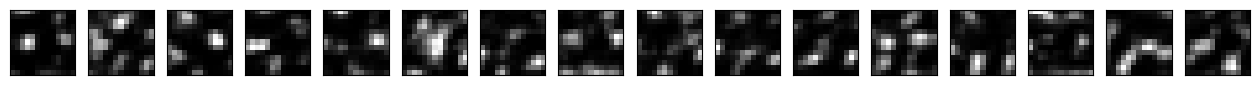

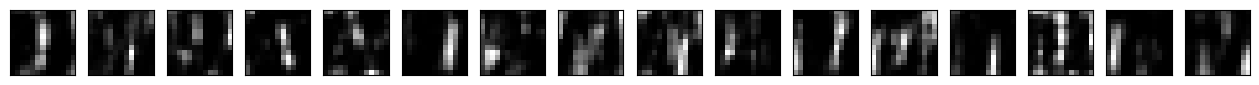

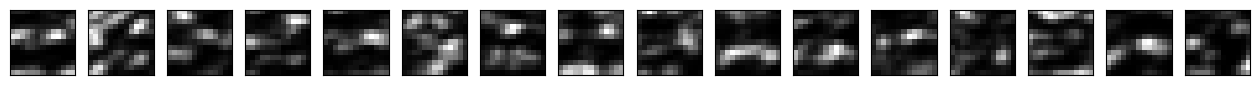

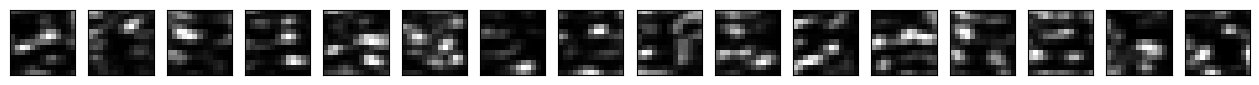

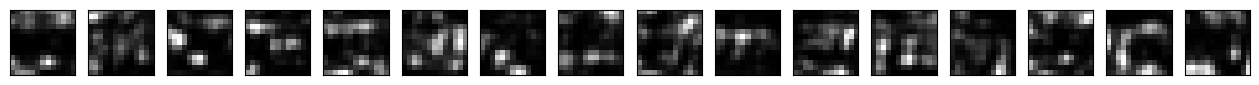

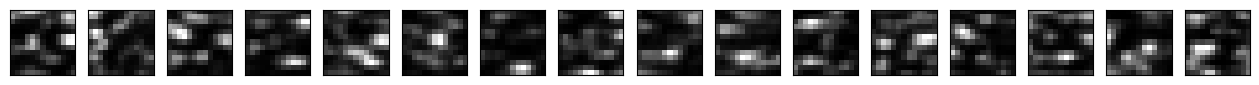

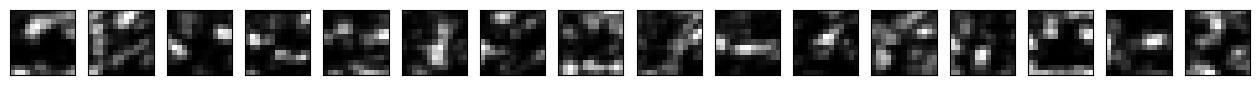

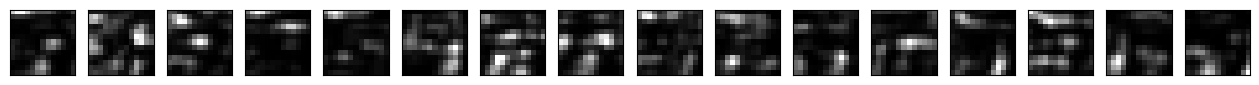

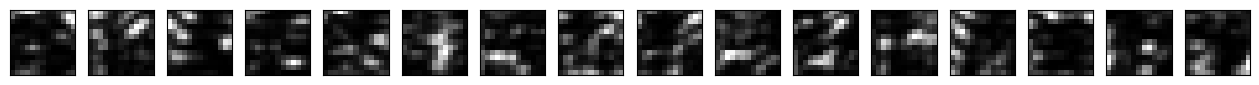

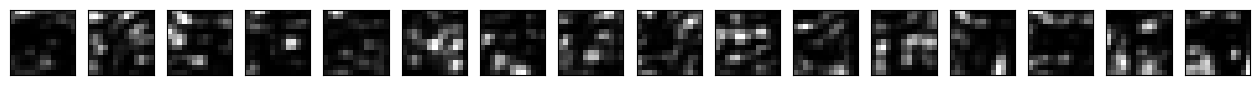

In [21]:
for i in range(10):
  display_activation(totals[i], 3)

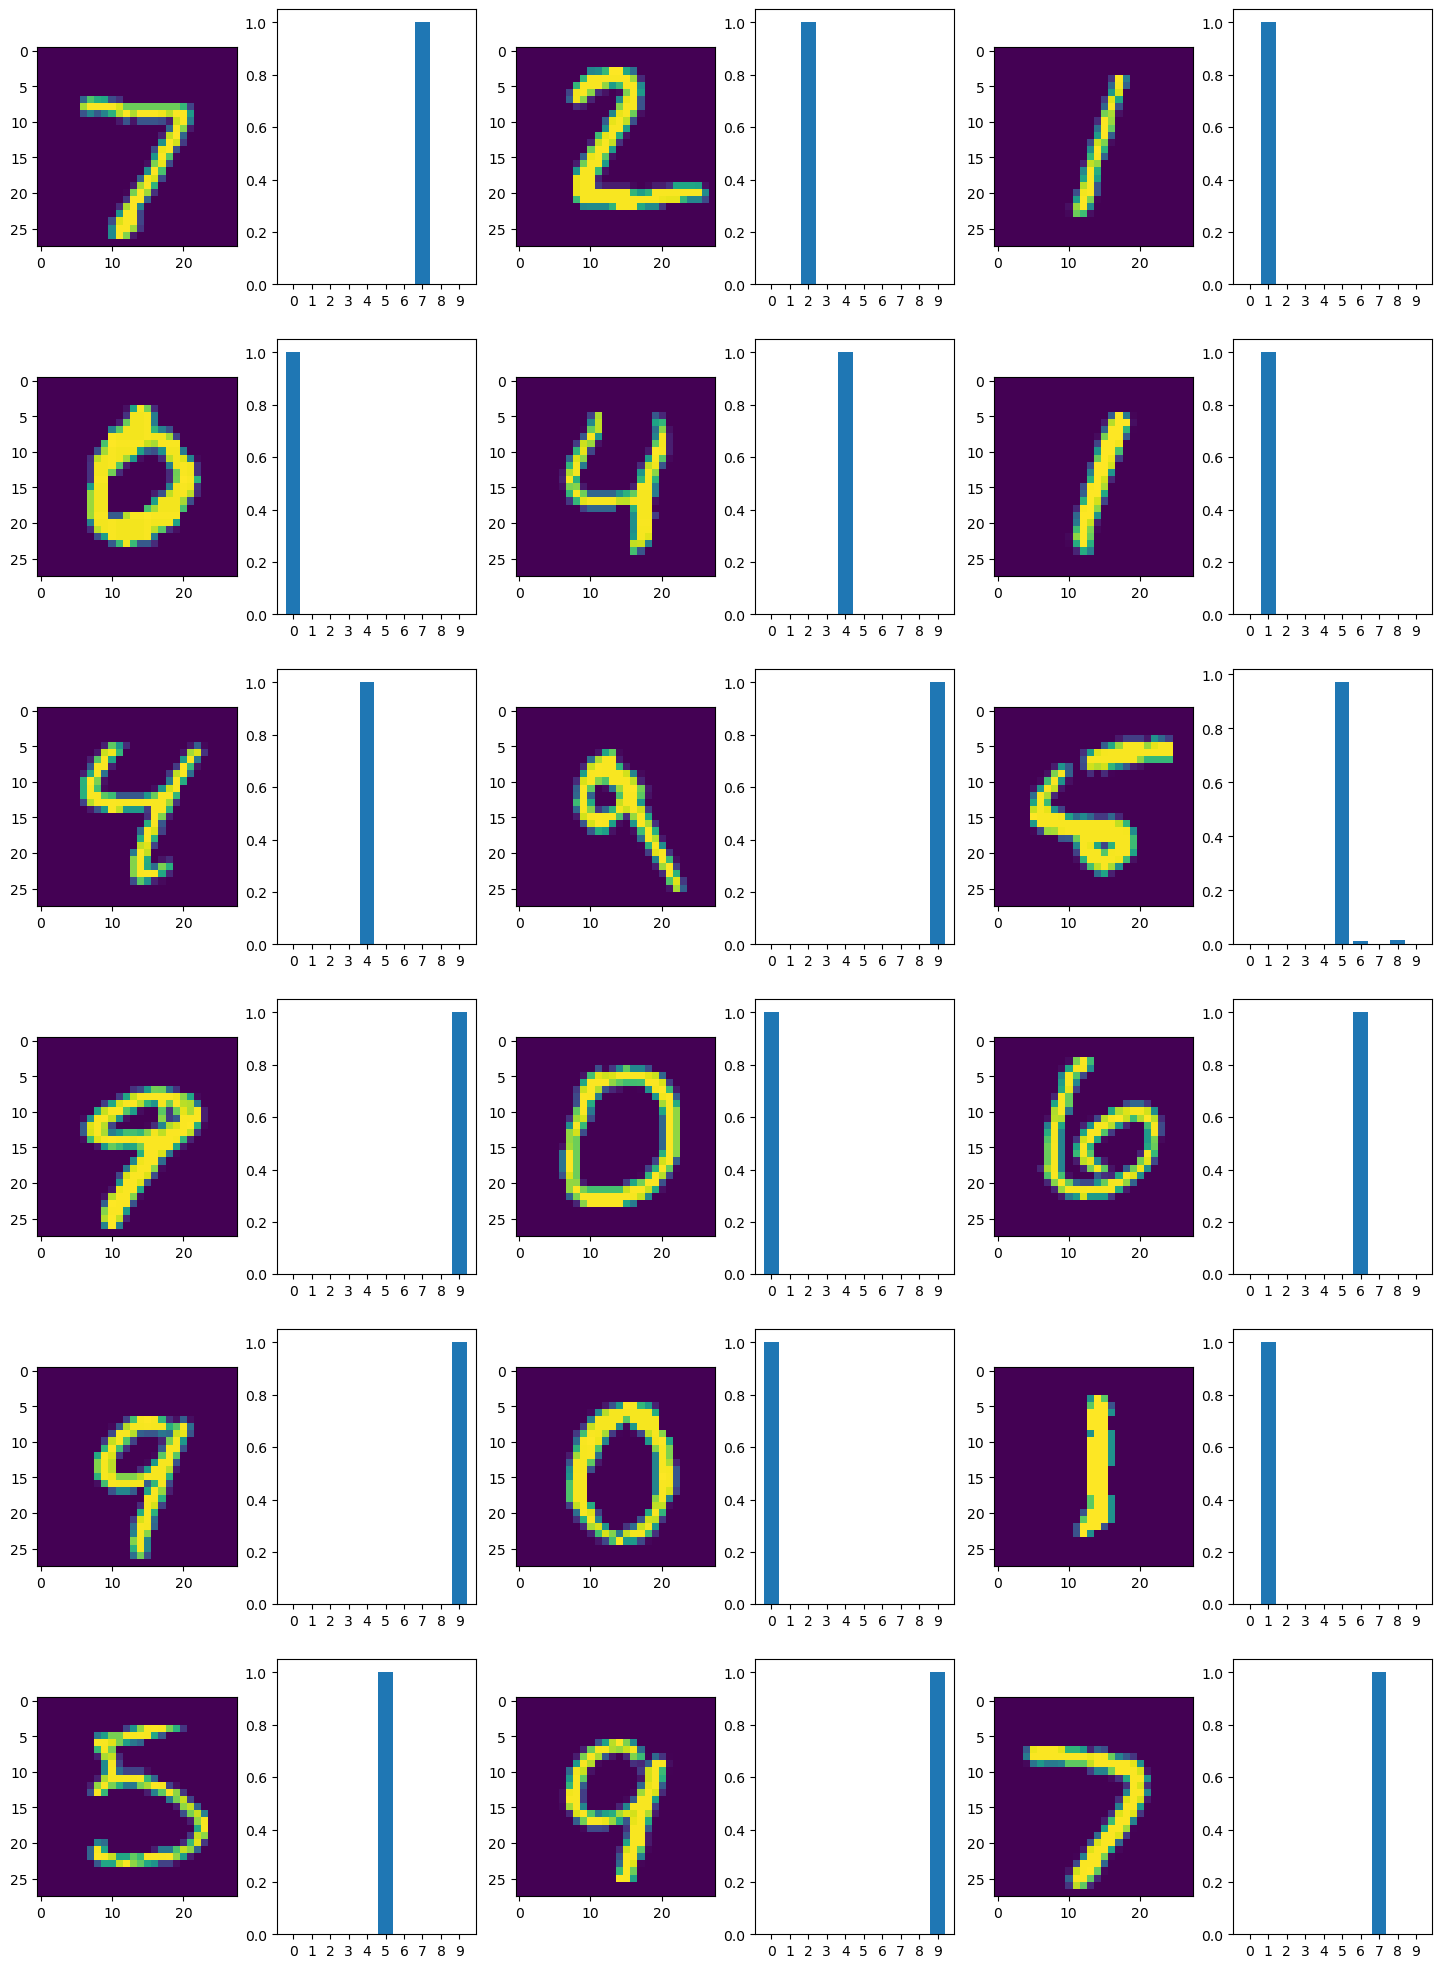

In [22]:
plt.figure(figsize = (18, 25))

count = 0
row_count = 0
for x, predict in zip(x_test, prediction[0:18]):
    plt.subplot(6, 6, count + 1)
    x = x.reshape(28, 28)
    plt.imshow(x)

    plt.subplot(6, 6, count + 2)
    plt.xticks(np.arange(10))
    plt.bar(list(range(10)), predict)
    
    if count % 6 == 5:
        row_count += 1
    count += 2